In [25]:
# https://ffbinaries.com/downloads
# https://users.cs.cf.ac.uk/Dave.Marshall/Multimedia/Lecture_Examples/Compression/mpegproj/
# http://www.scikit-video.org/stable/measure.html
# https://media.xiph.org/video/derf/

In [40]:
import numpy as np
import skvideo.io 
import skvideo.motion 
import skvideo.measure
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

### Motion Consempation

In [27]:
def motion_consempation(video_name, mbsize, method, videodata):
    motion = skvideo.motion.blockMotion(videodata,method=method,mbSize=mbsize)  
    compensate = skvideo.motion.blockComp(videodata, motion,mbSize=mbsize)  
    diff = videodata - compensate   
    skvideo.io.vwrite(f"output/{video_name}_mb{mbsize}.mp4", compensate)
    return motion, compensate, diff

### Metrics

In [28]:
def compute_metrics(videodata, compensate):
    mse = skvideo.measure.mse(videodata[:,:,:,1],compensate[:,:,:,1])
    psnr = skvideo.measure.psnr(videodata[:,:,:,1],compensate[:,:,:,1])
    ssim = skvideo.measure.ssim(videodata[:,:,:,1],compensate[:,:,:,1])
    return mse, psnr, ssim

In [29]:
def compute_mean_of_metrics(video_name, method, videoData):
    motion, compensate, _ = motion_consempation(video_name, 4,method,videoData)
    mse_4, psnr_4, ssim_4 = compute_metrics(videoData, compensate)

    motion, compensate, _  = motion_consempation(video_name, 8,method,videoData)
    mse_8, psnr_8, ssim_8 = compute_metrics(videoData, compensate)

    motion, compensate, _  = motion_consempation(video_name, 16,method,videoData)
    mse_16, psnr_16, ssim_16 = compute_metrics(videoData, compensate)

    data = [
        [np.mean(mse_4), np.mean(mse_8), np.mean(mse_16)],
        [np.mean(psnr_4),np.mean(psnr_8),np.mean(psnr_16)],
        [np.mean(ssim_4),np.mean(ssim_8),np.mean(ssim_16)]   
    ]
    return format_table(data)

### Format table

In [199]:
def format_table(data, headers = ["4*4", "8*8", "16*16"], indices = ["MSE", "PSNR", "SSIM"] ):
    table = pd.DataFrame(data, index=indices, columns=headers)
    return table

### Compute a method running time

In [200]:
def measure_execution_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time, result

### Reading video using skvideo

In [201]:
#num_frames=10,
suzie = skvideo.io.vread("../benchmarks/suzie_qcif.y4m", as_grey=False)
carphone = skvideo.io.vread("../benchmarks/carphone_qcif.y4m", as_grey=False)

### Defining block Sizes

In [202]:
mbsize_4 = 4
mbsize_8 = 8
mbsize_16 = 16

### Suzie SE3SS search

In [203]:
method='SE3SS'
table = compute_mean_of_metrics("Suzie",method, suzie)

C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\skvideo\measure\psnr.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  psnr = 10 * np.log10(maxsq / mse)


In [204]:
table

4*4          8*8        16*16
MSE   835.665527  1539.218994  2872.788086
PSNR         inf          inf          inf
SSIM    0.899144     0.859496     0.768459

### Carphone SE3SS search

In [205]:
method='SE3SS'
table = compute_mean_of_metrics("Carphone",method, carphone)

C:\ProgramData\anaconda3\envs\myenv\lib\site-packages\skvideo\measure\psnr.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  psnr = 10 * np.log10(maxsq / mse)


In [206]:
table

4*4          8*8        16*16
MSE   1118.777832  2067.275635  3954.211182
PSNR          inf          inf          inf
SSIM     0.873258     0.838329     0.754607

## Question #2

### Different Search algorithms

In [123]:
block_size = 8
times = []
ssims = []

### #ES

In [124]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "ES", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [125]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [126]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=22.56s
SSIM=0.85


### #3SS

In [127]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "3SS", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [128]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [129]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=13.64s
SSIM=0.86


### #N3SS

In [130]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "N3SS", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [131]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [132]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=20.73s
SSIM=0.92


### #SE3SS

In [133]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "SE3SS", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [134]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [135]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=6.55s
SSIM=0.86


### #4SS

In [136]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "4SS", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [137]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [138]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=21.11s
SSIM=0.84


### #ARPS

In [139]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "ARPS", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [140]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [141]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=9.66s
SSIM=0.82


### #DS

In [142]:
time_elapsed, (_,compensate,_) = measure_execution_time(motion_consempation, "Suzie", block_size, "DS", suzie) 
ssim = skvideo.measure.ssim(suzie[:,:,:,1],compensate[:,:,:,1])

In [143]:
times.append(time_elapsed)
ssims.append(np.mean(ssim))

In [144]:
print(f"Time elapsed={time_elapsed:.2f}s")
print(f"SSIM={np.mean(ssim):.2f}")

Time elapsed=12.88s
SSIM=0.82


In [213]:
ratio = [s/t for t, s in zip(times, ssims)]

In [214]:
table = format_table([times, ssims, ratio], headers = ["ES", "3SS", "N3SS", "SE3SS", "4SS","ARPS", "DS"], indices = ["Time elapsed(s)", "SSIM","Ratio"] )

In [215]:
table

ES        3SS       N3SS     SE3SS        4SS  \
Time elapsed(s)  22.564719  13.643063  20.727441  6.554770  21.112179   
SSIM              0.845176   0.857727   0.919529  0.859496   0.838850   
Ratio             0.037456   0.062869   0.044363  0.131125   0.039733   

                     ARPS         DS  
Time elapsed(s)  9.656829  12.878897  
SSIM             0.817757   0.819094  
Ratio            0.084682   0.063600

## Question #3

In [180]:
motion, _, _ = motion_consempation("Suzie", 8, "SE3SS", suzie) 

In [188]:
def plot_motion_vectors(motion, frame_num):
    grid_width = motion.shape[1]
    grid_height = motion.shape[2]
    # Create a grid for the bottom-left corner of each cell
    X, Y = np.meshgrid(range(motion.shape[1]), range(motion.shape[2]))
    U = motion[frame_num,:, :, 0]  # X components of vectors
    V = motion[frame_num,:, :, 1]  # Y components of vectors
    # Plotting
    plt.figure(figsize=(10, 10))
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
    plt.xlim(-0.5, grid_width-0.5)
    plt.ylim(-0.5, grid_height-0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis()  # Invert Y-axis to match typical matrix indexing (optional)
    plt.grid(True)
    plt.title(f'Motion vectors of Suzie frame #{frame_num}')
    plt.show()

In [189]:
print(motion.shape)

(149, 18, 22, 2)


In [190]:
# This means motions consist of 149 frames of 18 rows and 22 columns, and each cell has a motion vector of size 2

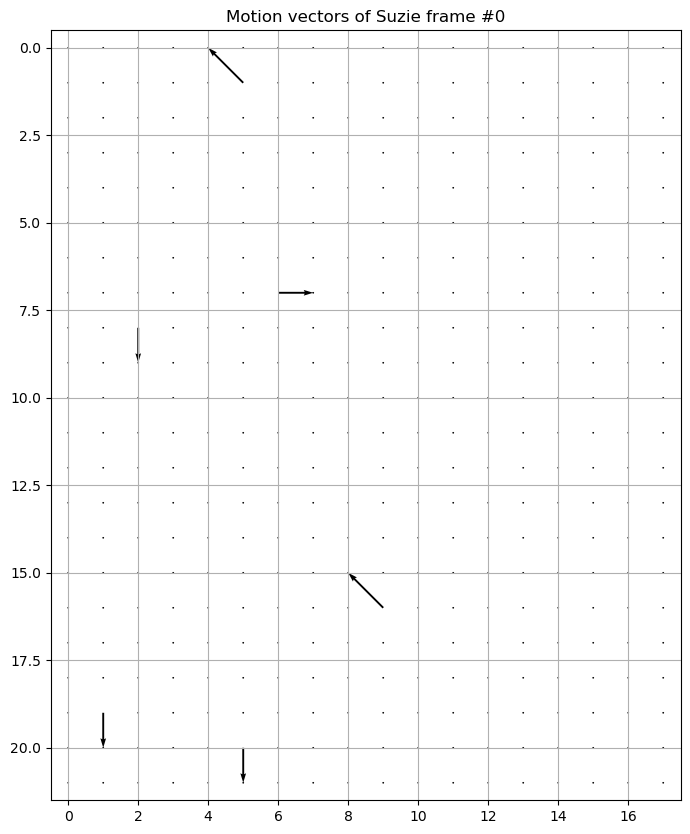

In [192]:
plot_motion_vectors(motion, 0)

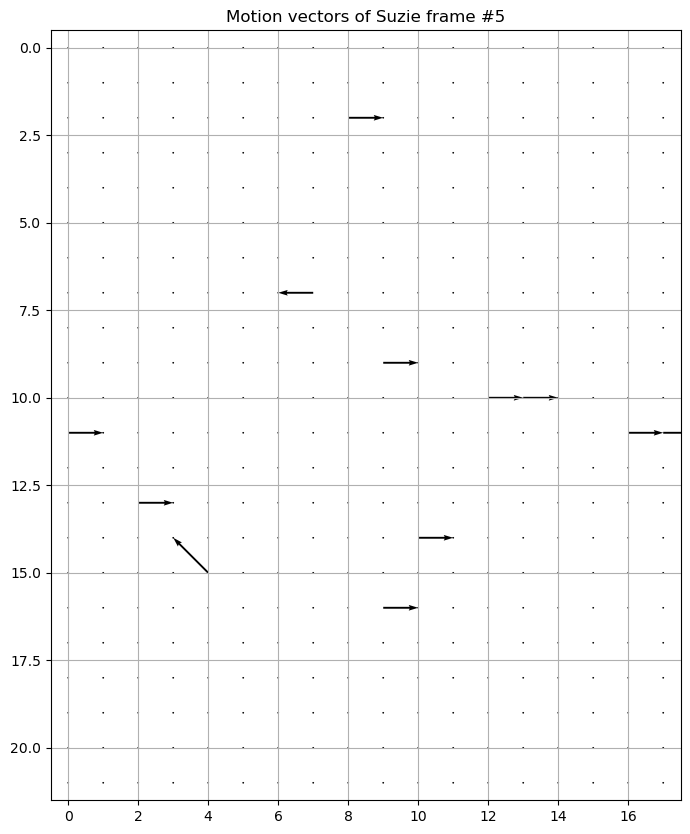

In [193]:
plot_motion_vectors(motion, 5)

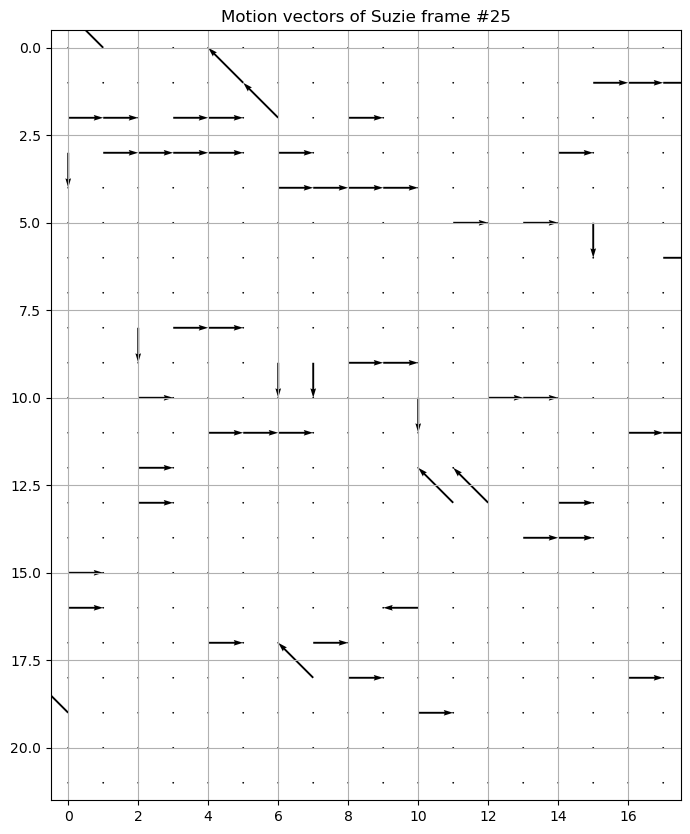

In [194]:
plot_motion_vectors(motion, 25)

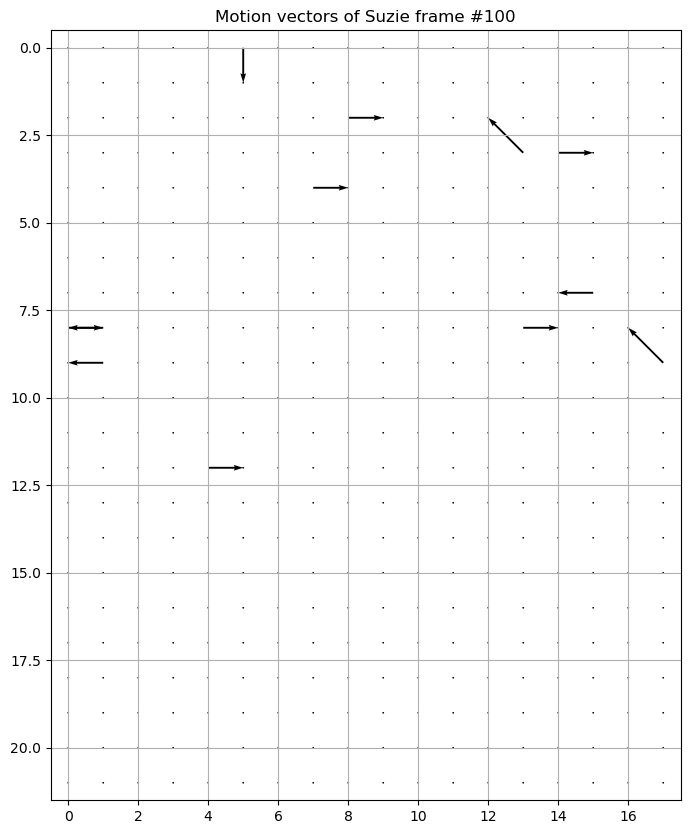

In [195]:
plot_motion_vectors(motion, 100)

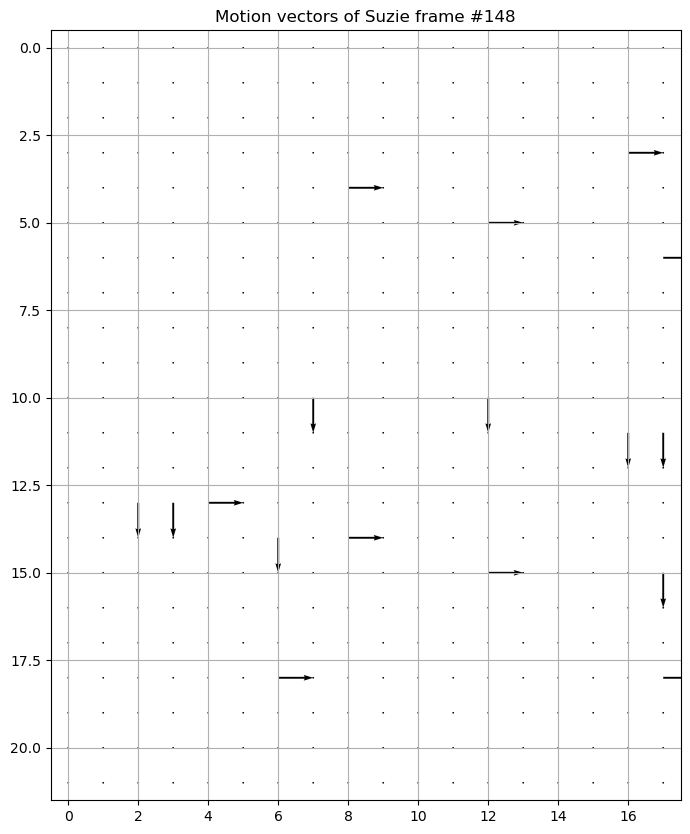

In [197]:
plot_motion_vectors(motion, 148)